In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow

In [3]:
from tensorflow.keras import datasets,layers,models

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

# Visualitization of the CIFAR dataset 

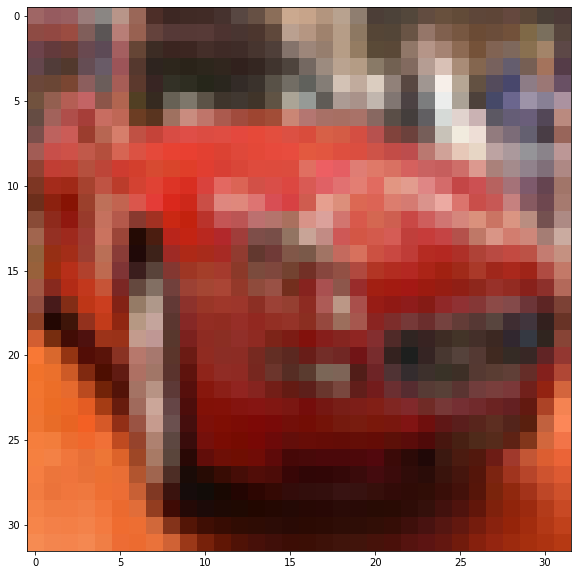

In [7]:
plt.figure(figsize=(25,10))
plt.imshow(x_train[5])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
#Providing names to the images
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_img(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

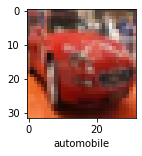

In [14]:
plot_img(x_train,y_train,5)

In [15]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

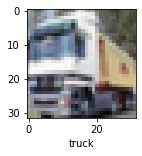

In [16]:
plot_img(x_train, y_train, 1)

In [28]:
#Normalizing the values
x_train=x_train/255
x_test=x_test/255
print(x_train)

[[[[0.00090734 0.00095348 0.00096886]
   [0.00066128 0.00070742 0.00069204]
   [0.00076894 0.00073818 0.00066128]
   ...
   [0.00242983 0.00202999 0.0016609 ]
   [0.00233756 0.00192234 0.00156863]
   [0.00227605 0.00190696 0.00158401]]

  [[0.00024606 0.00030757 0.00030757]
   [0.         0.         0.        ]
   [0.00027682 0.00012303 0.        ]
   ...
   [0.00189158 0.00135333 0.00084583]
   [0.00183007 0.00127643 0.00076894]
   [0.0018762  0.00133795 0.00087659]]

  [[0.00038447 0.00036909 0.00032295]
   [0.00024606 0.00010765 0.        ]
   [0.00075356 0.00041522 0.00012303]
   ...
   [0.00181469 0.00129181 0.00076894]
   [0.00184544 0.00129181 0.00076894]
   [0.00167628 0.00112265 0.00064591]]

  ...

  [[0.00319877 0.00261438 0.00147636]
   [0.00309112 0.00235294 0.00052288]
   [0.00304498 0.00247597 0.00039985]
   ...
   [0.00246059 0.00204537 0.00107651]
   [0.00086121 0.00047674 0.00010765]
   [0.00081507 0.00052288 0.00030757]]

  [[0.00276817 0.00213764 0.00147636]
   [0.0

#Developing the CNN model

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print(cnn)

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4479 - accuracy: 0.48390s - loss: 1.4488 - accura
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0855 - accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9593 - accuracy: 0.6665
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8716 - accuracy: 0.6955
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8053 - accuracy: 0.7192
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7443 - accuracy: 0.7383
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6922 - accuracy: 0.7603
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6414 - accuracy: 0.7758
Epoch 9/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6036 - accuracy: 0.7873
Epoch 10/10
1563/1563 [===============

In [21]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9687 - accuracy: 0.6969


[0.9687082171440125, 0.6969000101089478]

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[4.36108821e-05, 4.92789832e-06, 1.77235238e-03, 9.26762283e-01,
        1.55163492e-04, 7.01548979e-02, 1.05598803e-04, 2.08751706e-04,
        1.98526614e-04, 5.93787991e-04],
       [2.83275614e-03, 7.90378153e-02, 2.51462893e-07, 1.06108371e-06,
        2.25933796e-08, 2.13736477e-08, 3.47146478e-11, 8.20204182e-10,
        9.17277992e-01, 8.50055018e-04],
       [1.80979948e-02, 1.10769197e-01, 2.54513277e-03, 4.19440120e-02,
        6.47449982e-04, 8.83664645e-04, 1.95318120e-04, 1.89325248e-03,
        7.57726908e-01, 6.52971119e-02],
       [7.70873249e-01, 5.78553695e-03, 8.47357046e-03, 2.76854541e-03,
        2.50970502e-03, 2.11175648e-04, 1.35963683e-05, 8.22007496e-06,
        2.09160790e-01, 1.95646877e-04],
       [6.64157085e-07, 1.09563407e-03, 2.23436989e-02, 2.55023867e-01,
        1.13842346e-01, 1.68434177e-02, 5.90559840e-01, 9.52607588e-05,
        9.73589558e-05, 9.78691896e-05]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

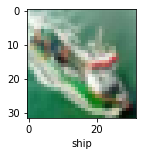

In [24]:
plot_img(x_test, y_test,15)

In [25]:
from keras.models import load_model
from keras.models import Model


In [27]:
cnn.save("Image Classification-CNN.h5")